## Import library and create train and test dataset

In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, utils
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import os


## Initialize data and the path of the data

In [9]:
test_dir = 'archive/test'
train_dir = 'archive/train'
emotions = os.listdir(train_dir)

train_data = []
test_data = []
train_pred = []
test_pred = []

emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

## Analyze frequency of each emotion

In [10]:
emotion_freq_train = {}
emotion_freq_test = {}

for emotion in emotions:
    img_list1 = os.listdir(train_dir+'/'+emotion)
    emotion_freq_train[emotion] = len(img_list1)
    
    img_list2 = os.listdir(test_dir+'/'+emotion)
    emotion_freq_test[emotion] = len(img_list2)
    
    

emotion_freq_train.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

## Display frequency

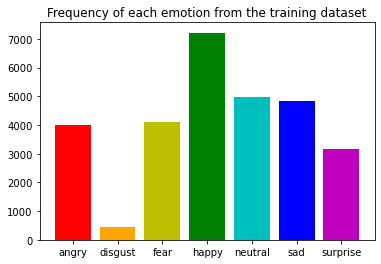

In [11]:
color = ['r', 'orange', 'y', 'g', 'c', 'b', 'm']
plt.title('Frequency of each emotion from the training dataset')
plt.bar(list(emotion_freq_train.keys()), emotion_freq_train.values(), color=color)
plt.show()

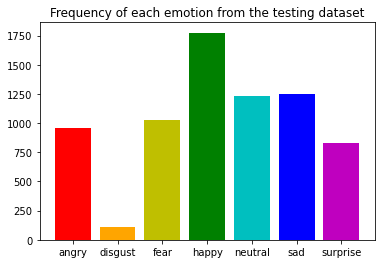

In [12]:
plt.title('Frequency of each emotion from the testing dataset')
plt.bar(list(emotion_freq_test.keys()), emotion_freq_test.values(), color=color)
plt.show()

## Retrieve data from the directory

In [13]:
# Label each emotion as a number
emotion_legend = {}
for i in range(7):
    emotion_legend[emotions[i]] = i

# Generate the training and testing data sets 
for emotion in emotions:
    img_list = os.listdir(train_dir+'/'+emotion)
    test_img_list = os.listdir(test_dir+'/'+emotion)
    # Create train_dataset and train_pred
    for img in img_list:
        img = image.imread(train_dir+'/'+emotion+'/'+img)
        train_data.append(img)
        train_pred.append(emotion_legend[emotion])
    # Create test_dataset and test_pred
    for img in test_img_list:
        img = image.imread(test_dir+'/'+emotion+'/'+img)
        test_data.append(img)
        test_pred.append(emotion_legend[emotion])


## Normalize the dataset

In [14]:
# Convert the training and testing sets into numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)
train_pred = np.array(train_pred)
test_pred = np.array(test_pred)

# Normalize the images in the dataset
train_data, test_data = train_data / 255.0, test_data / 255.0

## Print the shape of the dataset

In [15]:
#Print the shapes of the training and testing sets
print(train_data.shape)
print(test_data.shape)
print(train_pred.shape)
print(test_pred.shape)

(28709, 48, 48)
(7178, 48, 48)
(28709,)
(7178,)


## References:

We used the following link to retrieve the dataset for our data mining project: https://www.kaggle.com/datasets/msambare/fer2013?resource=download

We used the given link to understand and apply the proper function to convert .jpg image files into a numpy array: https://www.youtube.com/watch?v=qY2m7Fin_7M

## Apply the convolutional base

In [ ]:
# Generate the Convolutional Neural Network (CNN)
model = models.Sequential()
model.add(layers.Conv2D(48, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_pred, epochs=20, 
                    validation_data=(test_data, test_pred))


Epoch 1/20
898/898 [==============================] - 40s 45ms/step - loss: 1.6467 - accuracy: 0.3470 - val_loss: 1.5538 - val_accuracy: 0.4004
Epoch 2/20
898/898 [==============================] - 45s 50ms/step - loss: 1.4104 - accuracy: 0.4597 - val_loss: 1.3536 - val_accuracy: 0.4817
Epoch 3/20
898/898 [==============================] - 48s 54ms/step - loss: 1.2963 - accuracy: 0.5039 - val_loss: 1.3011 - val_accuracy: 0.5050
Epoch 4/20
898/898 [==============================] - 49s 54ms/step - loss: 1.2197 - accuracy: 0.5367 - val_loss: 1.2724 - val_accuracy: 0.5095
Epoch 5/20
898/898 [==============================] - 44s 49ms/step - loss: 1.1544 - accuracy: 0.5619 - val_loss: 1.2244 - val_accuracy: 0.5316
Epoch 6/20
898/898 [==============================] - 46s 51ms/step - loss: 1.0976 - accuracy: 0.5872 - val_loss: 1.2374 - val_accuracy: 0.5326
Epoch 7/20
704/898 [======================>.......] - ETA: 9s - loss: 1.0358 - accuracy: 0.6092

## Plot the accuracy

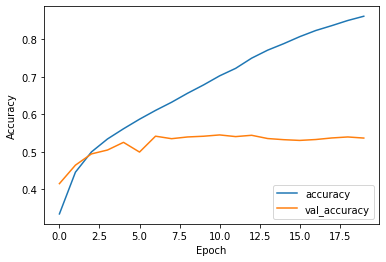

In [16]:
# Graph the CNN's accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Plot the losses

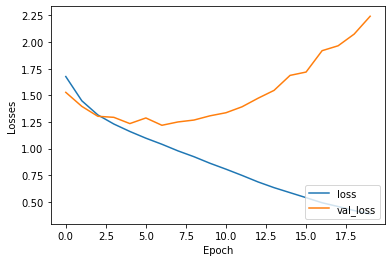

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(loc='lower right')
plt.show()